# Telco customer analytics

# Business problem:


Through this project, I want to identify the root causes for customer churn and predict it by machine learning.   


# Client:

My client, Telco Company, is a telephone and internet service provider with over 5000 customers. In order to grow and maintain profitability, it’s essential that they learn how to maintain a dedicated customer base and reduce churn. Based on my analysis, Telco can :

1.	Identify customers that are likely to churn and reach out to them to try to stop them from churning via special offers targeted to their needs

2.	Focus marketing on customers that are more likely to be long term customers

3.	Modify their services to improve the likelihood customers will stay longer term


# 1.	Obtaining the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
customer=pd.read_csv('customer_data.csv')

customer['gender']= np.where((customer['gender'])=='Male',1, 0)


In [2]:
customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2.	Data cleaning:

In [3]:
customer.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

 This dataset has no missing values. 

# Constructing the Data:

Convert columns with yes/ no to 0/1
  


In [4]:
customer['Partner'] = customer['Partner'].apply(lambda x: 0 if x=='No' else 1)


In [5]:
customer['Dependents'] = customer['Dependents'].apply(lambda x: 0 if x=='No' else 1)

In [6]:
customer['PhoneService'] = customer['PhoneService'].apply(lambda x: 0 if x=='No' else 1)

In [7]:
customer['OnlineSecurity'] = customer['OnlineSecurity'].apply(lambda x: 0 if x=='No' else 1)

In [8]:
customer['TechSupport'] = customer['TechSupport'].apply(lambda x: 0 if x=='No' else 1)
customer['StreamingTV'] = customer['StreamingTV'].apply(lambda x: 0 if x=='No' else 1)
customer['OnlineBackup'] = customer['OnlineBackup'].apply(lambda x: 0 if x=='No' else 1)
customer['StreamingMovies'] = customer['StreamingMovies'].apply(lambda x: 0 if x=='No' else 1)
customer['DeviceProtection'] = customer['DeviceProtection'].apply(lambda x: 0 if x=='No' else 1)
customer['PaperlessBilling'] = customer['PaperlessBilling'].apply(lambda x: 0 if x=='No' else 1)
customer['Churn'] = customer['Churn'].apply(lambda x: 0 if x=='No' else 1)
customer['MultipleLines'] = customer['MultipleLines'].apply(lambda x: 1 if x=='Yes' else 0)
customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Use get_dummy turning a column to multiple column

In [9]:

customer = pd.concat([customer.drop('InternetService',axis=1), pd.get_dummies(customer['InternetService'])],axis=1)
customer = pd.concat([customer.drop('Contract',axis=1), pd.get_dummies(customer['Contract'])],axis=1)
customer = pd.concat([customer.drop('PaymentMethod',axis=1), pd.get_dummies(customer['PaymentMethod'])],axis=1)


In [10]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
customerID                   7043 non-null object
gender                       7043 non-null int32
SeniorCitizen                7043 non-null int64
Partner                      7043 non-null int64
Dependents                   7043 non-null int64
tenure                       7043 non-null int64
PhoneService                 7043 non-null int64
MultipleLines                7043 non-null int64
OnlineSecurity               7043 non-null int64
OnlineBackup                 7043 non-null int64
DeviceProtection             7043 non-null int64
TechSupport                  7043 non-null int64
StreamingTV                  7043 non-null int64
StreamingMovies              7043 non-null int64
PaperlessBilling             7043 non-null int64
MonthlyCharges               7043 non-null float64
TotalCharges                 7043 non-null object
Churn                        7043 non-null int64
DSL    

# 3. Exploring the Data

In [11]:
churn_data=customer[customer['Churn']==1]

# The percentage of churn customers in total customers

This graph shows the result of report in which customers are churn or not churn. Form the graph, it is clear that the majority of customers are not churn with just 43 % different to churn customers. 

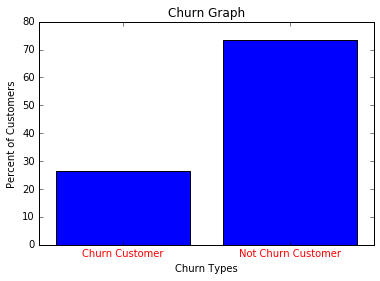

In [12]:
churncustomer = len(customer[customer['Churn']==1])
notchurncustomer = len(customer[customer['Churn']==0])
customer_len=len(customer)
churn_customer=churncustomer/float(customer_len)*100
not_churn_customer=notchurncustomer/float(customer_len)*100
x=[1,2]
y=[churn_customer,not_churn_customer]
plt.bar(x, y, color="blue",align = 'center')
labels = ['Churn Customer', 'Not Churn Customer']
plt.xticks(x,labels, color='red')

plt.xlabel('Churn Types')
plt.ylabel('Percent of Customers')
plt.title('Churn Graph')
plt.show()


# The distribution of phone and internet service through all customers 

From the pie chart, The percent of Fiber and phone is majority with 44% of total customers. The percent of customer from using phone and DSL, is the second place in chart with 24.7% of total customers. The percent of customer  from using phone only are 21.7 % of total customers. The percent of DSl only is 9.7% total customer and 0% of fiber only.

HYpothesis: the customers use phone and fiber are likely to churn than other service groups. 

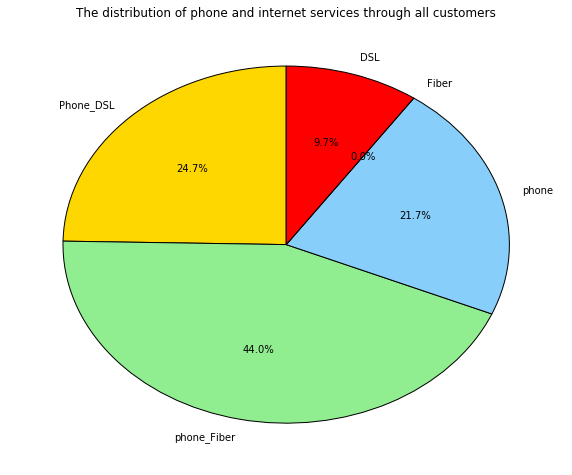

7043

In [13]:
percent_phone_DSL=len(customer[(customer["DSL"]==1)&(customer["Fiber optic"]==0)&(customer["PhoneService"]==1)])
percent_phone_Fiber=len(customer[(customer["Fiber optic"]==1)&(customer["DSL"]==0)&(customer["PhoneService"]==1)])
percent_phone=len(customer[(customer["PhoneService"]==1)&(customer["Fiber optic"]==0)&(customer["DSL"]==0)])
percent_Fiber=len(customer[(customer["PhoneService"]==0)&(customer["Fiber optic"]==1)&(customer["DSL"]==0)])
percent_DSL=len(customer[(customer["PhoneService"]==0)&(customer["Fiber optic"]==0)&(customer["DSL"]==1)])

labels = 'Phone_DSL', 'phone_Fiber', 'phone', 'Fiber','DSL'
sizes = [percent_phone_DSL, percent_phone_Fiber, percent_phone, percent_Fiber,percent_DSL]
colors = ['gold', 'lightgreen', 'lightskyblue', 'white','red']
plt.figure(figsize=(10,8))

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('The distribution of phone and internet services through all customers')
plt.show()


len(customer)

# The percentage of customer churn from using phone and internet services.

The bar chart shows the percentage of customer churn in three distinct service groups of phone and DSL, phone and Fiber, and phone only. The percent of customer churn from using phone and fiber is majority with 41% of total customers. The percent of customer churn from using phone and DSL, is the second place in chart with 16% of total customers. Finally, the percent of customer churn from using phone only are 7 % of total customers. Overall, it is clearly that the customers use phone and fiber are likely to churn than other service groups. 

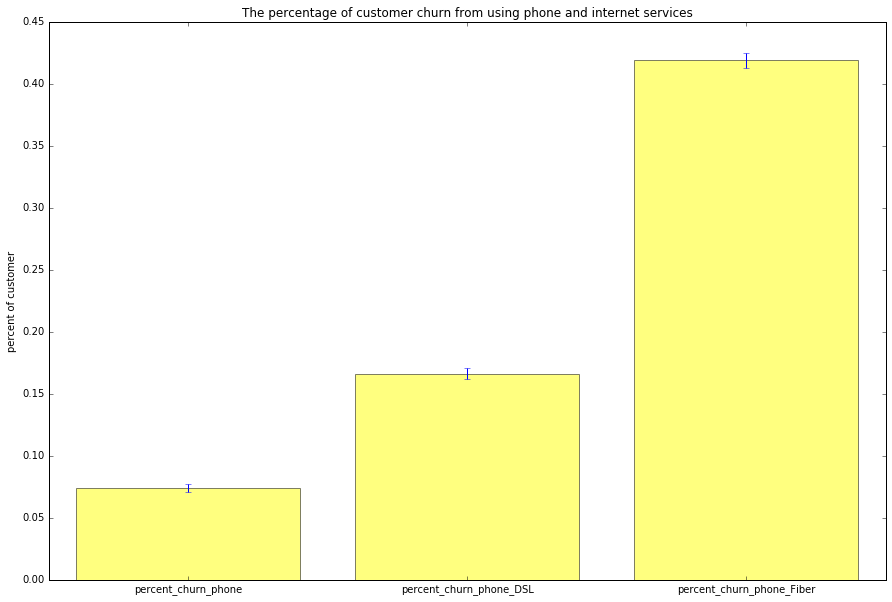

In [14]:
import math as math
def meanstd (x,y):
    mean = x.mean()
    std = math.sqrt((mean*(1-mean))/y)
    return mean, std
percent_churn_phone_DSL=customer[(customer["DSL"]==1)&(customer["PhoneService"]==1)].Churn
percent_churn_phone_Fiber=customer[(customer["Fiber optic"]==1)&(customer["PhoneService"]==1)].Churn
percent_churn_phone=customer[(customer["PhoneService"]==1)&((customer["Fiber optic"]==0)&(customer["DSL"]==0))].Churn
axis = ('percent_churn_phone','percent_churn_phone_DSL','percent_churn_phone_Fiber')
y_pos = np.arange(len(axis))
plt.figure(figsize=(15,10))
value=[percent_churn_phone_DSL,percent_churn_phone_Fiber,percent_churn_phone]
customer_length=7043
df1_mean,df1_std=meanstd(percent_churn_phone_DSL,customer_length)
df2_mean,df2_std=meanstd(percent_churn_phone_Fiber,customer_length)
df3_mean,df3_std=meanstd(percent_churn_phone,customer_length)


value = (df3_mean,df1_mean, df2_mean)
Std = (df3_std,df1_std, df2_std)

plt.bar(y_pos, value, yerr=Std, align='center', alpha=0.5, color='yellow')
plt.xticks(y_pos, axis)
plt.ylabel('percent of customer')
plt.title('The percentage of customer churn from using phone and internet services')
plt.show()


# The distribution of other services through all customers


From The pie chart, The percent of customer from using streamTv and streammovies are majority 18.1% and 18% total customers.The percent of customer from using DeviceProtection and OnlineBackup are the second place,16.8% total customers.The last two are OnlineSecurity and TechSupport, 15.1% and 15.2% total customers.

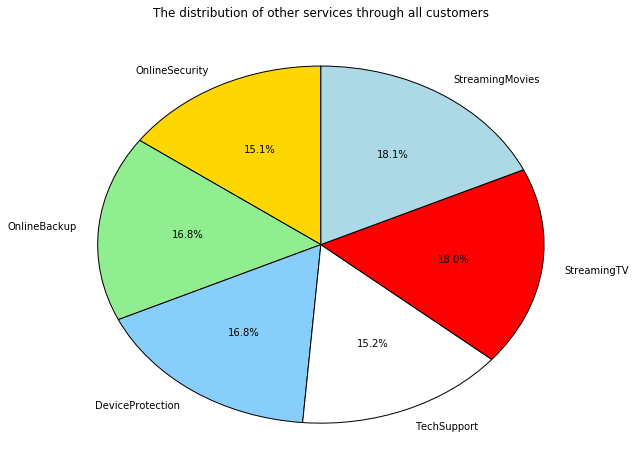

In [15]:
percent_customer_OnlineSecurity=len(customer[(customer["OnlineSecurity"]==1)])
percent_customer_OnlineBackup=len(customer[(customer["OnlineBackup"]==1)])
percent_customer_DeviceProtection=len(customer[(customer["DeviceProtection"]==1)])
percent_customer_TechSupport=len(customer[(customer["TechSupport"]==1)])
percent_customer_StreamingTV=len(customer[(customer["StreamingTV"]==1)])
percent_customer_StreamingMovies=len(customer[(customer["StreamingMovies"]==1)])
labels = 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies'
sizes = [percent_customer_OnlineSecurity, percent_customer_OnlineBackup, percent_customer_DeviceProtection,
         percent_customer_TechSupport,percent_customer_StreamingTV,percent_customer_StreamingMovies]
colors = ['gold', 'lightgreen', 'lightskyblue', 'white','red','lightblue']
plt.figure(figsize=(10,8))

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')

plt.title('The distribution of other services through all customers')
plt.show()


# The percentage of customer churn from other services

From The bar chart, The percent of customer churn from using streamTv and streammovies are majority, 21% total customers. The percent of customer churn from using DeviceProtection is the second place, 16.6% total customers. The percent of customer churn from using OnlineBackup is 16% of total customers. The last two are OnlineSecurity and TechSupport, 11.5% and 11.8% total customers.


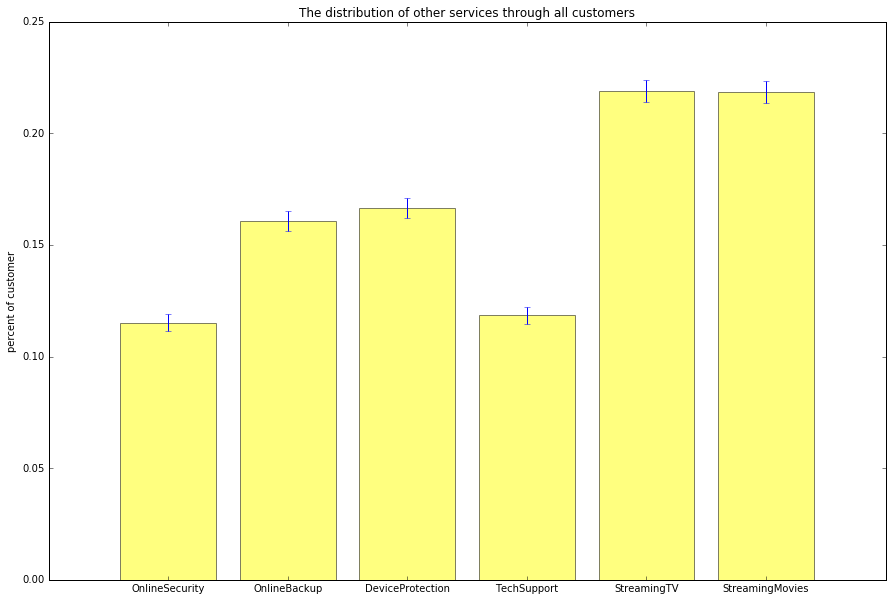

(0.11509167842031029, 0.16080910240202276, 0.16666666666666666, 0.11848739495798319, 0.21899362154500354, 0.21864725223109441)


In [16]:

customer_OnlineSecurity=customer[(customer["OnlineSecurity"]==1)].Churn
customer_OnlineBackup=customer[(customer["OnlineBackup"]==1)].Churn
customer_DeviceProtection= customer[(customer["DeviceProtection"]==1)].Churn
customer_TechSupport=customer[(customer["TechSupport"]==1)].Churn
customer_StreamingTV=customer[(customer["StreamingTV"]==1)].Churn
customer_StreamingMovies=customer[(customer["StreamingMovies"]==1)].Churn

labels = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']
y_pos = np.arange(len(labels))
plt.figure(figsize=(15,10))
value=[customer_OnlineSecurity,customer_OnlineBackup,customer_DeviceProtection,customer_TechSupport,customer_StreamingTV,customer_StreamingMovies]
customer_length=7043
df4_mean,df4_std=meanstd(customer_OnlineSecurity,customer_length)
df5_mean,df5_std=meanstd(customer_OnlineBackup,customer_length)
df6_mean,df6_std=meanstd(customer_DeviceProtection,customer_length)
df7_mean,df7_std=meanstd(customer_TechSupport,customer_length)
df8_mean,df8_std=meanstd(customer_StreamingTV,customer_length)
df9_mean,df9_std=meanstd(customer_StreamingMovies,customer_length)

value = (df4_mean,df5_mean, df6_mean,df7_mean, df8_mean,df9_mean)
Std = (df4_std,df5_std, df6_std,df7_std,df8_std, df9_std)

plt.bar(y_pos, value, yerr=Std, align='center', alpha=0.5, color='yellow')
plt.xticks(y_pos, labels)
plt.ylabel('percent of customer')
plt.title('The distribution of other services through all customers')
plt.show()
print(value)


# The Percentage of customer churn between the Fiber with other services and the DSL with other services.

The bar chart shows the percent of churn customers in two categories, fiber with other services and DSL with other services. Other services are online security, online backup, device protection, tech support, streaming Tv and streaming movies.T he percent of fiber with other services is 9.2% of total customers and the percent of DSL with other services is 1.3% of total customers.

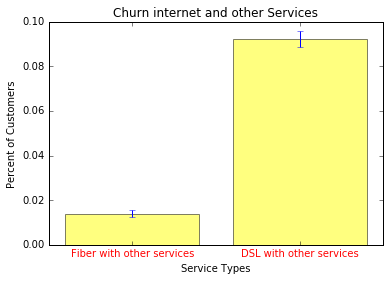

In [17]:
churn_phone_DSL_other=customer[(customer["DSL"]==1)&(customer["OnlineSecurity"]==1)&(customer["OnlineBackup"]==1)
                                      &(customer["DeviceProtection"]==1)&(customer["TechSupport"]==1)&(customer["StreamingTV"]==1)
                                     &(customer["StreamingMovies"]==1)].Churn
churn_phone_Fiber_other=customer[(customer["Fiber optic"]==1)&(customer["OnlineSecurity"]==1)&(customer["OnlineBackup"]==1)
                                      &(customer["DeviceProtection"]==1)&(customer["TechSupport"]==1)&(customer["StreamingTV"]==1)
                                     &(customer["StreamingMovies"]==1)].Churn
axis1=[1,2]
df_DSL_mean,df_DSL_std=meanstd(churn_phone_DSL_other,customer_length)

df_Fiber_mean,df_Fiber_std=meanstd(churn_phone_Fiber_other,customer_length)

value = (df_DSL_mean,df_Fiber_mean)
Std = (df_DSL_std,df_Fiber_std)

plt.bar(axis1, value, yerr=Std, align='center', alpha=0.5, color='yellow')
 
labels = ['Fiber with other services' ,'DSL with other services']

plt.xticks(axis1,labels, color='red')

plt.xlabel('Service Types')
plt.ylabel('Percent of Customers')
plt.title('Churn internet and other Services')
plt.show()

# The percentage of customer churn in different payment types 

The bar chart illustrates the percentage of customer churn in four different payment types: Credit card (automatic), Bank transfer (automatic), Mailed check, Electronic check. The Electronic check is the most popular payment type with 42% of total customers. The second highest payment type is Mailed check, 19% of total customers. The Credit card (automatic) and Bank transfer (automatic) are mostly the same with 16% and 15% customers.

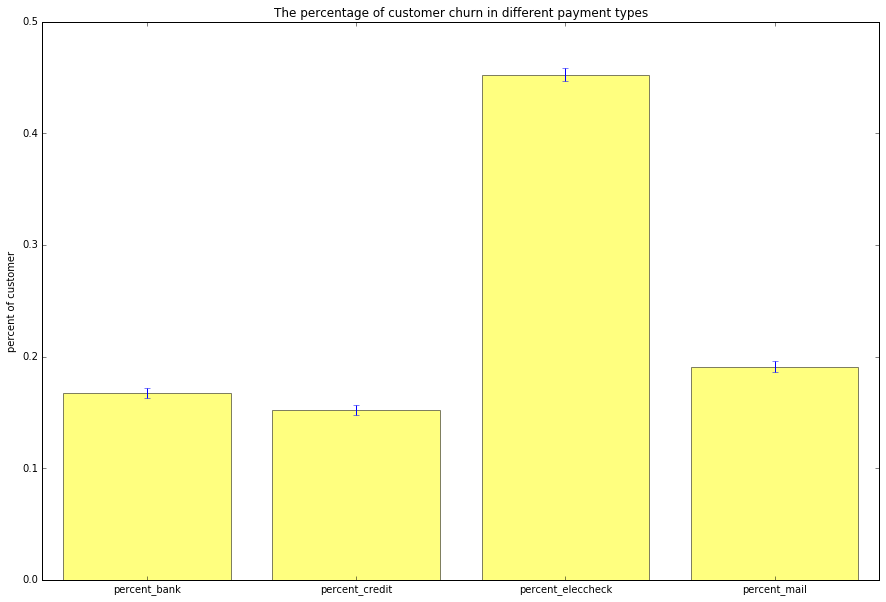

In [18]:
percent_bank=customer[(customer["Bank transfer (automatic)"]==1)].Churn
percent_credit=customer[(customer["Credit card (automatic)"]==1)].Churn
percent_eleccheck=customer[(customer["Electronic check"]==1)].Churn
percent_mail=customer[(customer["Mailed check"]==1)].Churn

axisL = ('percent_bank','percent_credit','percent_eleccheck','percent_mail')

y_posi = np.arange(len(axisL))

plt.figure(figsize=(15,10))


df_bank_mean,df_bank_std=meanstd(percent_bank,customer_length)

df_Credit_mean,df_Credit_std=meanstd(percent_credit,customer_length)

df_check_mean,df_check_std=meanstd(percent_eleccheck,customer_length)

df_mail_mean,df_mail_std=meanstd(percent_mail,customer_length)

value1 = (df_bank_mean,df_Credit_mean,df_check_mean, df_mail_mean)
Std1 = (df_bank_std,df_Credit_std,df_check_std, df_mail_std)

plt.bar(y_posi, value1, yerr=Std1, align='center', alpha=0.5, color='yellow')
plt.xticks(y_posi, axisL)
plt.ylabel('percent of customer')
plt.title('The percentage of customer churn in different payment types')
plt.show()

# The percentage of churn customers in different payment plans. 

The bar chart illustrates the percentage of churn customers in three different payment plans: month to month, one year and two years. The month to month plan has the highest percent of churn customer, 42% compare to the others. The one year plan is 2% and 11% for two years. 

Hypothesis: customers are likely to churn when they sign up for month to month payment plan.

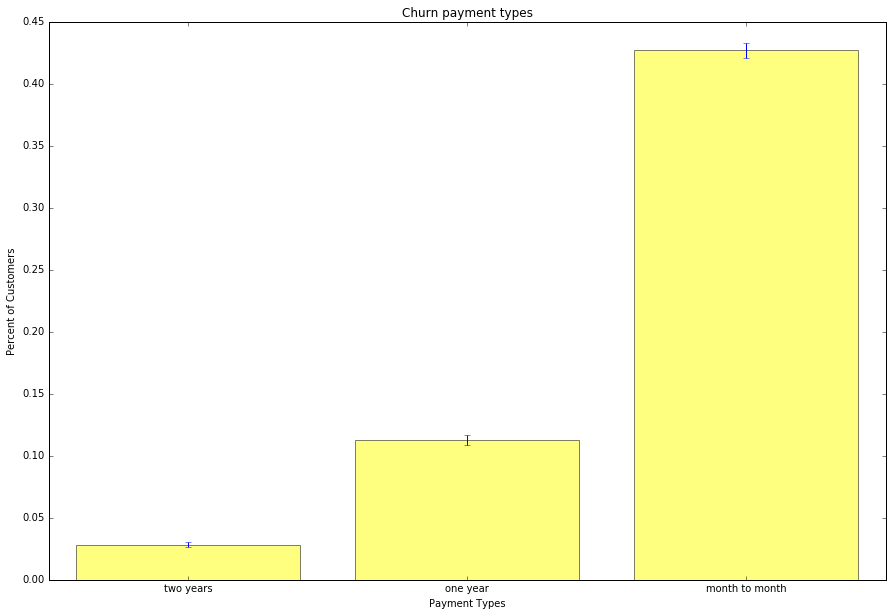

In [19]:
percent_churn_datamonthly=customer[(customer["Month-to-month"]==1)].Churn
percent_churn_dataone=customer[(customer["One year"]==1)].Churn
percent_churn_datatwo=customer[(customer["Two year"]==1)].Churn

axislabel = ('two years','one year','month to month')
y_posit = np.arange(len(axislabel))
plt.figure(figsize=(15,10))
value1=[percent_churn_datatwo,percent_churn_dataone,percent_churn_datamonthly]
df_bank_mean,df_bank_std=meanstd(percent_bank,customer_length)

df_two_mean,df_two_std=meanstd(percent_churn_datatwo,customer_length)

df_one_mean,df_one_std=meanstd(percent_churn_dataone,customer_length)

df_month_mean,df_month_std=meanstd(percent_churn_datamonthly,customer_length)


value_pay = (df_two_mean,df_one_mean, df_month_mean)
Std_pay = (df_two_std,df_one_std, df_month_std )

plt.bar(y_posit, value_pay, yerr=Std_pay, align='center', alpha=0.5, color='yellow')
plt.xticks(y_posit, axislabel)

plt.xlabel('Payment Types')
plt.ylabel('Percent of Customers')
plt.title('Churn payment types')
plt.show()


# churn by tenure(month)

The distribution of tenure vs no churn is bimodal. it has two peaks the first month and last month in tenure

The distribution of tenure vs churn is skewed right. it has a peaks the first month and slowly down in the end.

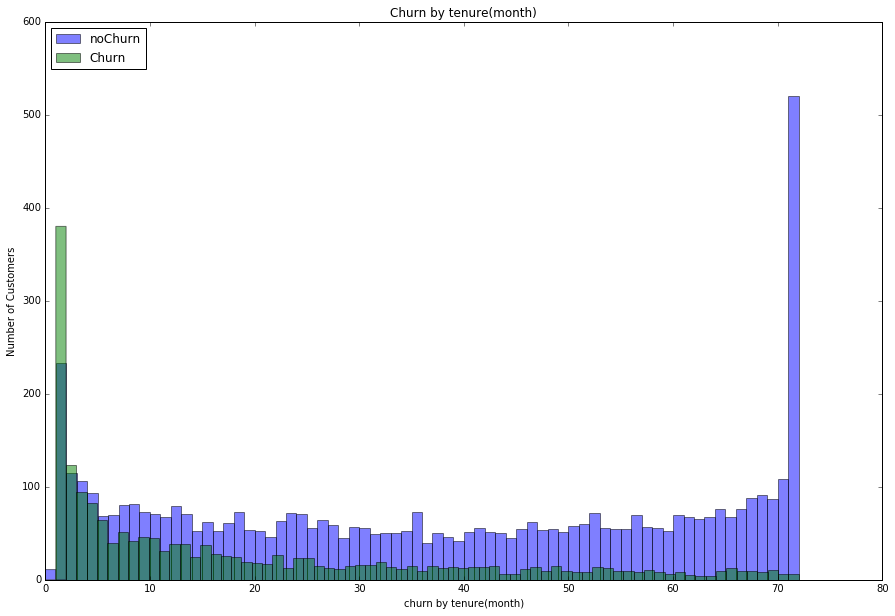

In [20]:
noChurn_tdata= customer[customer["Churn"]==0].tenure
churn_tdata= customer[customer["Churn"]==1].tenure
plt.figure(figsize=(15,10))
plt.hist([noChurn_tdata], bins=72,alpha=0.5,label='noChurn'
         )
plt.hist([churn_tdata], bins=72,alpha=0.5,label='Churn'
         )       
plt.xlabel('churn by tenure(month)')
plt.ylabel('Number of Customers')
plt.legend(loc='upper left')
plt.title('Churn by tenure(month)')
plt.show()

# The percentage of customer churn in Demographics (gender/partner/dependents) 

The bar chart shows the percent of churn customers compares in three different demographics’ categories gender, partner, and dependent. In gender category, the percent of customer churn in female and male are mostly the same, male is 26.9% of total customers and female is 26.1% of total customers. In partner category, the customers have no partner likely to churn than partner. The percent of churn customer with partner is 19 % total cutomer, and the percent with no partner is 32% total customer. In dependent category, it is mostly the same with partner category. The percent of no dependent is higher than dependents, the no dependent is 31%total cutsomers, and the dependent is 15% total customers. 

Hypothesis: the customer has no partner and no dependent is highly percent to churn than other. 

In [21]:
def barplot(x):
    length= len(customer[x])
    axislabel = (1,2)
    y_position = np.arange(len(axislabel))
    churn_x=customer[(customer[x]==1)].Churn
    churn_y= customer[(customer[x]==0)].Churn
    value_cond=[churn_x,churn_y]
    df_x_mean = churn_x.mean()
    df_x_std = math.sqrt((df_x_mean*(1-df_x_mean))/length)
    df_y_mean = churn_y.mean()
    df_y_std = math.sqrt((df_y_mean*(1-df_y_mean))/length)
    value_def = (df_x_mean, df_y_mean )
    Std_def = (df_x_std, df_y_std)

    return  value_def,Std_def,y_position



    

# Gender

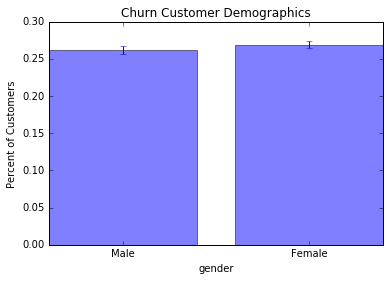

In [22]:
gender_mean, gender_std, gender_position= barplot("gender")
plt.bar(gender_position, gender_mean, yerr=gender_std, align='center', alpha=0.5)
labels = ['Male','Female']

plt.xticks(gender_position, labels)

plt.xlabel('gender')
plt.ylabel('Percent of Customers')
plt.title('Churn Customer Demographics')
plt.show()

# Partner

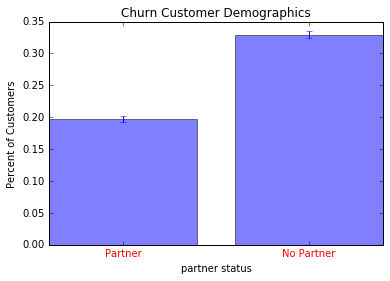

In [23]:

partner_mean,partner_std, partner_position= barplot("Partner")
plt.bar(partner_position, partner_mean, yerr=partner_std, align='center', alpha=0.5)
labels = ['Partner','No Partner']

plt.xticks(partner_position,labels, color='red')

plt.xlabel('partner status')
plt.ylabel('Percent of Customers')
plt.title('Churn Customer Demographics')
plt.show()



# Dependents:

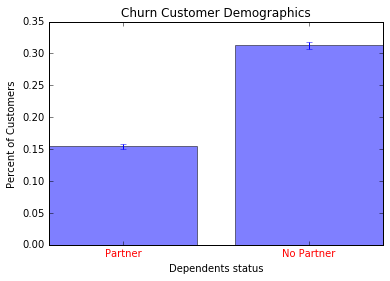

In [24]:
Dependents_mean,Dependents_std, Dependents_position= barplot("Dependents")
plt.bar(Dependents_position, Dependents_mean, yerr=Dependents_std, align='center', alpha=0.5)

plt.xticks(Dependents_position,labels, color='red')

labels = ['Dependents','No Dependents']

plt.xlabel('Dependents status')
plt.ylabel('Percent of Customers')
plt.title('Churn Customer Demographics')
plt.show()

# The percentage of churn customers in total senior customers


This graph shows the result of report in which senior customers are churn or not churn. Form the graph, it is clear that the majority of customers are not churn with just 2.7 % different to churn customers. 

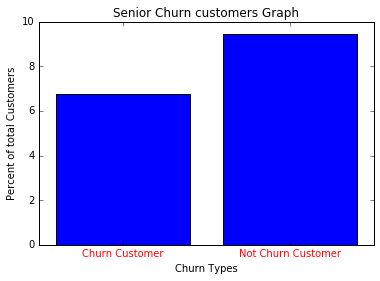

(6.758483600738321, 9.456197643049837)


In [25]:
churncustomer = len(customer[(customer['Churn']==1)&(customer["SeniorCitizen"]==1)])
notchurncustomer = len(customer[(customer['Churn']==0)&(customer["SeniorCitizen"]==1)])
customer_len=len(customer)
churn_customer=churncustomer/float(customer_len)*100
not_churn_customer=notchurncustomer/float(customer_len)*100
x=[1,2]
y=[churn_customer,not_churn_customer]
plt.bar(x, y, color="blue",align = 'center')
labels = ['Churn Customer', 'Not Churn Customer']
plt.xticks(x,labels, color='red')

plt.xlabel('Churn Types')
plt.ylabel('Percent of total Customers')
plt.title('Senior Churn customers Graph')
plt.show()
print(churn_customer,not_churn_customer)

# Sernior Discount by Tenure (month)

The histogram chart shows the number of customers are senior by tenure (month). The distribution of tenure is bimodal. it has two peaks the first month and last month in tenure.The first month has majority of the customer with 86 customers, and the second peak has 56 customers at last month . The data range from about 1 to about 72, so the approximate range equals 71. There seem to be no probable outliers in this graph.

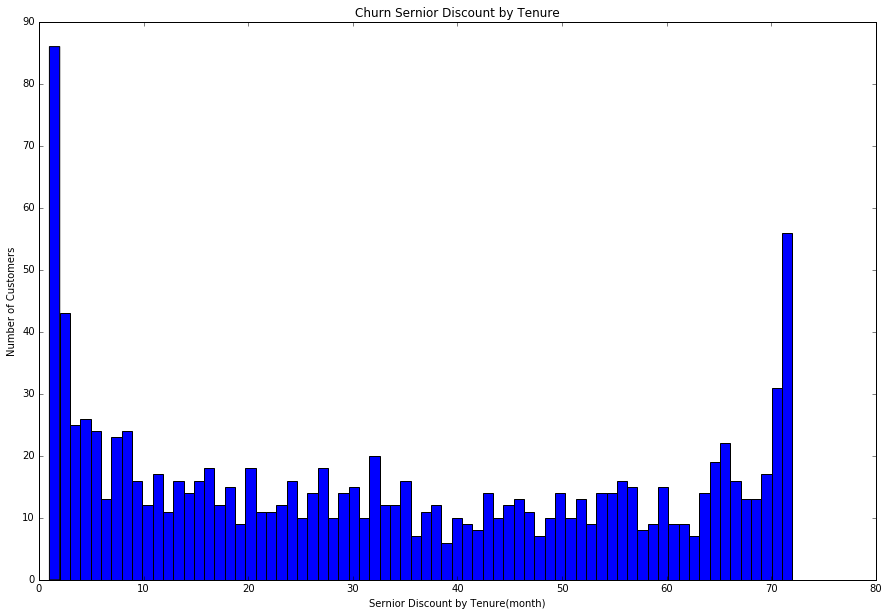

In [26]:
seniordata= customer[customer["SeniorCitizen"]==1].tenure

plt.figure(figsize=(15,10))
plt.hist([seniordata], bins=72,
         color=["Blue"]) 
plt.xlabel('Sernior Discount by Tenure(month)')
plt.ylabel('Number of Customers')
plt.title('Churn Sernior Discount by Tenure')
plt.show()

# The percentage of churn customers in total not senior customers

This graph shows the result of report in which non-senior customers are churn or not churn. Form the graph, it is clear that the majority of customers are not churn with just 44.3 % different to churn customers. Therefore, this company is still doing a good job to keep senior customers happy with its services.

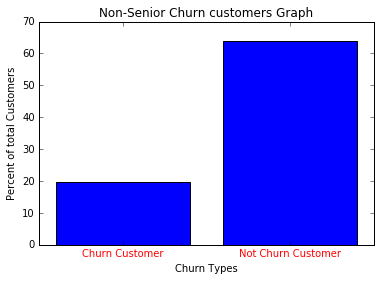

(19.778503478631265, 64.00681527758057)


In [27]:
churncustomer = len(customer[(customer['Churn']==1)&(customer["SeniorCitizen"]==0)])
notchurncustomer = len(customer[(customer['Churn']==0)&(customer["SeniorCitizen"]==0)])
customer_len=len(customer)
churn_customer=churncustomer/float(customer_len)*100
not_churn_customer=notchurncustomer/float(customer_len)*100
x=[1,2]
y=[churn_customer,not_churn_customer]
plt.bar(x, y, color="blue",align = 'center')
labels = ['Churn Customer', 'Not Churn Customer']
plt.xticks(x,labels, color='red')

plt.xlabel('Churn Types')
plt.ylabel('Percent of total Customers')
plt.title('Non-Senior Churn customers Graph')
plt.show()
print(churn_customer,not_churn_customer)

# No senior by tenure (month)

The histogram chart shows the number of customers are not senior by tenure (month). The distribution of tenure is bimodal. it has two peaks the first month and last month in tenure.The first month has majority of the customer with over 527 customers, and the second peak has 306 total customers at last month . The data range from about 1 to about 72, so the approximate range equals 71. There seem to be no probable outliers in this graph.

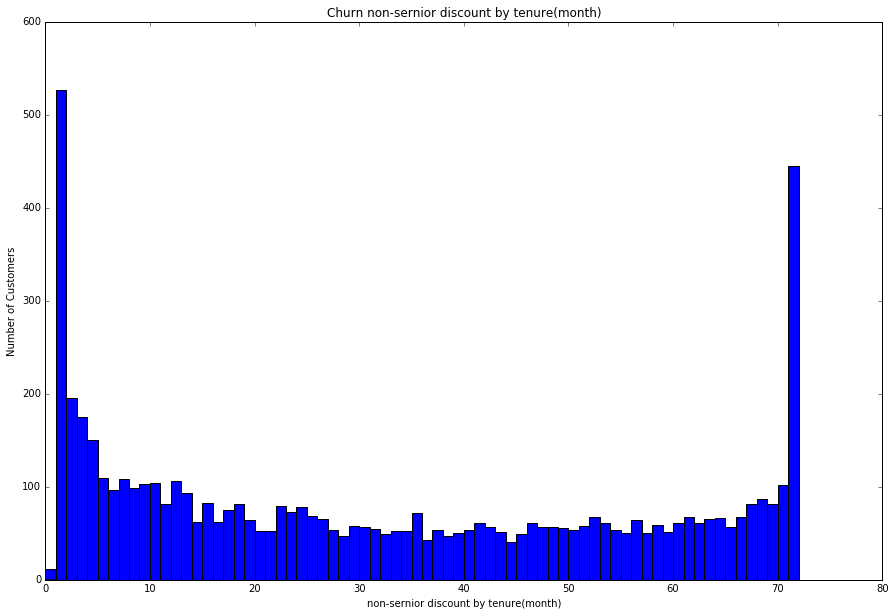

In [28]:
nosenior_data= customer[customer["SeniorCitizen"]==0].tenure
plt.figure(figsize=(15,10))
plt.hist([nosenior_data], bins=72,
         color=["Blue"]) 
plt.xlabel('non-sernior discount by tenure(month)')
plt.ylabel('Number of Customers')
plt.title('Churn non-sernior discount by tenure(month)')
plt.show()

In [29]:
customer.mean()

gender                        0.504756
SeniorCitizen                 0.162147
Partner                       0.483033
Dependents                    0.299588
tenure                       32.371149
PhoneService                  0.903166
MultipleLines                 0.421837
OnlineSecurity                0.503337
OnlineBackup                  0.561550
DeviceProtection              0.560557
TechSupport                   0.506886
StreamingTV                   0.601022
StreamingMovies               0.604572
PaperlessBilling              0.592219
MonthlyCharges               64.761692
Churn                         0.265370
DSL                           0.343746
Fiber optic                   0.439585
No                            0.216669
Month-to-month                0.550192
One year                      0.209144
Two year                      0.240664
Bank transfer (automatic)     0.219225
Credit card (automatic)       0.216101
Electronic check              0.335794
Mailed check             

# 4. Inferential Statistics

Apply the fundamentals of statistical inference and hypothesis testing to this project.
 
Project Question: Is there a correlation between the customer groups and the tenure? If so, 
We use the tenure like a satisfaction measurement to pinpoint directly to these customer groups, try to understand further what distinctions are there, and which traits lead to better productiblity or lead to less satisfaction. 
 
Questions for Concern:
1.    Are there variables that are particularly significant in terms of explaining the answer to your project question?
·         Most Important Variable: tenure
2.    Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable?

# Summary Statistics


·         There are churn customer, and stayed customers.

·         Overview of churn V.S. Non-churn Statistics

·         Summary Statistics

# Statistical Analysis

In [30]:
s=customer.corr()
s

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.010429,-0.008191,0.002988,...,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.185532,-0.087952,-0.094810,...,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.129936,0.136058,0.147692,...,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.188434,0.138756,0.129415,...,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.263746,0.312694,0.312740,...,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.057880,0.092867,0.074776,...,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,-0.084766,0.018908,0.017718,...,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206
OnlineSecurity,-0.010429,-0.185532,0.129936,0.188434,0.263746,0.057880,-0.084766,1.000000,0.378468,0.371808,...,-0.023066,-0.411561,0.522429,-0.403255,0.121904,0.353300,0.084322,0.105510,-0.336364,0.191715
OnlineBackup,-0.008191,-0.087952,0.136058,0.138756,0.312694,0.092867,0.018908,0.378468,1.000000,0.361488,...,-0.164783,-0.228047,0.464720,-0.338796,0.111755,0.287944,0.081590,0.087822,-0.236947,0.099975
DeviceProtection,0.002988,-0.094810,0.147692,0.129415,0.312740,0.074776,0.017718,0.371808,0.361488,1.000000,...,-0.175942,-0.218148,0.465658,-0.397454,0.129639,0.339190,0.077791,0.107618,-0.239705,0.087422


In [31]:

s = s.unstack()
so = s.sort_values()

print (so.head())

No              MonthlyCharges   -0.763557
MonthlyCharges  No               -0.763557
tenure          Month-to-month   -0.645561
Month-to-month  tenure           -0.645561
Fiber optic     DSL              -0.640987
dtype: float64


Highest correlated features: Fiber optic & MonthlyCharges

Lowest correlated feature : No internet service & MonthlyCharges


In [32]:
churn_summary=customer.groupby('Churn')
churn_summary.mean()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,,,,,,,,,,,,,,,,,,
0,0.507344,0.128721,0.528218,0.344801,37.569965,0.901044,0.409934,0.606301,0.641477,0.635872,...,0.379204,0.347700,0.273096,0.429068,0.252609,0.318322,0.248550,0.249324,0.250097,0.252029
1,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.218299,0.340289,0.352060,...,0.245586,0.693954,0.060460,0.885500,0.088818,0.025682,0.138042,0.124131,0.573034,0.164794


In [33]:
customer.mean()

gender                        0.504756
SeniorCitizen                 0.162147
Partner                       0.483033
Dependents                    0.299588
tenure                       32.371149
PhoneService                  0.903166
MultipleLines                 0.421837
OnlineSecurity                0.503337
OnlineBackup                  0.561550
DeviceProtection              0.560557
TechSupport                   0.506886
StreamingTV                   0.601022
StreamingMovies               0.604572
PaperlessBilling              0.592219
MonthlyCharges               64.761692
Churn                         0.265370
DSL                           0.343746
Fiber optic                   0.439585
No                            0.216669
Month-to-month                0.550192
One year                      0.209144
Two year                      0.240664
Bank transfer (automatic)     0.219225
Credit card (automatic)       0.216101
Electronic check              0.335794
Mailed check             

Divided two group of customers: churn vs non churn 

In [34]:
# group 1 : churn
churn_pop=customer[(customer['Churn']==1)]
# group 2 : non churn
notchurn_pop=customer[(customer['Churn' ]!=1)]

In [35]:
#create variables 
#length of chrun customers 
n1 = len(churn_pop)
#length of not chrun customers 
n2 = len(notchurn_pop)
#mean of chrun customers 
mean1= churn_pop.mean()
#mean of not chrun customers 
mean2= notchurn_pop.mean()

# Histogram

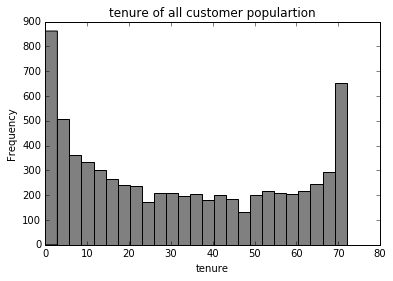

In [36]:
#Graph of entire customer 
customer['tenure'].plot(kind='hist',color='0.5',bins=25,title='tenure of all customer populartion').set_xlabel('tenure')

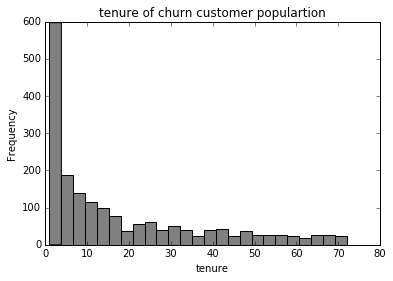

In [37]:
#Graph of entire churn customer 
churn_pop['tenure'].plot(kind='hist',color='0.5',bins=25,title='tenure of churn customer populartion').set_xlabel('tenure')

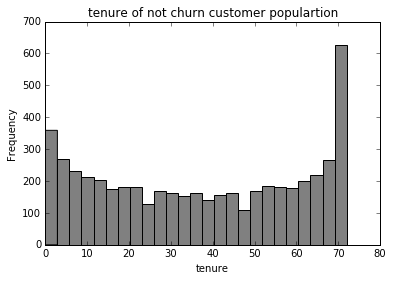

In [38]:
#Graph of entire not churn customer 
notchurn_pop['tenure'].plot(kind='hist',color='0.5',bins=25,title='tenure of not churn customer populartion').set_xlabel('tenure')

# T-TEST

The T-Test is one type of inferential statistics. It is used to determine whether there is a significant difference between the means of two groups.

# One sample test:

The One Sample T-Test determines whether the sample mean is statistically different from a known or hypothesized population mean.
 
·         Null Hypothesis:  there is no difference in tenure between churn customers and the customer population.

·         Alternate Hypothesis: there is a significant difference in tenure between churn custom

In [39]:
import scipy.stats as stats
from scipy.stats import norm
import scipy.stats
import math as math



# Conducting the T-Test

At 95% confidence level to test the hypothesis. Stats.ttest_1samp () function is used to conduct one sample T-Test

In [40]:
emp_population_tenure = customer['tenure'].mean()
emp_churn_tenure = customer[customer['Churn']==1]['tenure'].mean()

print( 'The mean for the customer population is: ' + str(emp_population_tenure) )
print( 'The mean for the Churn customer : ' + str(emp_churn_tenure) )

The mean for the customer population is: 32.3711486582
The mean for the Churn customer : 17.9791332263


In [41]:
stats.ttest_1samp(a=  customer[customer['Churn']==1]['tenure'], 
                  popmean = emp_population_tenure) 

Ttest_1sampResult(statistic=-31.856572712421674, pvalue=3.0614037111362083e-178)

 
The result the t value is -31.85 , and p value < 0.05. In order to proof that null hypothesis is rejected surely, we calculate degrees of freedom whether the t-statistic is outside of the quantiles of the t-distribution. 

In [42]:
degree_freedom = len(customer[customer['Churn']==1])
# Left Quartile
LeftQ = stats.t.ppf(0.025,degree_freedom) 
 # Right Quartile
RightQ = stats.t.ppf(0.975,degree_freedom) 

print ('The t-distribution left quartile range is: ' + str(LeftQ))
print ('The t-distribution right quartile range is: ' + str(RightQ))

The t-distribution left quartile range is: -1.96123406594
The t-distribution right quartile range is: 1.96123406594


In [43]:

sigma = customer[customer['Churn']==1]['tenure'].std()/math.sqrt(degree_freedom + 1)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = degree_freedom,                     # Degrees of freedom
                 loc = emp_churn_tenure, # Sample mean
                 scale= sigma)

(17.093332889308954, 18.86493356333952)

 
The t-statistic is outside of the quantiles of the t-distribution and p value is less than 0.05. Therefore null hypothesis is rejected. 

# Two Sample test:
    

---Gender:

null hypothesis : there is no different between male and female in customer churn.

hypothesis :there is a different between male and female in customer churn.

    

In [44]:
male = customer[customer['gender']==1].Churn
female= customer[customer['gender']==0].Churn
stats.ttest_ind(male,female,equal_var=False)

Ttest_indResult(statistic=-0.72261049878576156, pvalue=0.46994323541735661)

pvalue<0.05 , so null hypothesis is rejected 

---Dependent status :


null hypothesis : there is no different between dependent and no dependent in customer churn.

hypothesis :there is a different between dependent and no dependent in customer churn.
    

In [45]:
depent = customer[customer['Dependents']==1].Churn
no_depent =customer[customer['Dependents']==0].Churn
stats.ttest_ind(depent,no_depent,equal_var=False)

Ttest_indResult(statistic=-15.409078802902004, pvalue=2.1775286391572522e-52)

pvalue<0.05 , so null hypothesis is rejected 

---Partner status :



null hypothesis : there is no different between partner and no partner in customer churn.

hypothesis :there is a different between partner and no partner in customer churn.
    

In [46]:
partner = customer[customer['Partner']==1].Churn
no_partner =customer[customer['Partner']==0].Churn
stats.ttest_ind(partner,no_partner,equal_var=False)

Ttest_indResult(statistic=-12.841725043203832, pvalue=2.529114349220257e-37)

pvalue<0.05 , so null hypothesis is rejected 

---senior discount:

null hypothesis : there is no different between senior and no senior in customer churn.

hypothesis :there is a different between senior and no senior in customer churn.

In [47]:
Senior = customer[customer['SeniorCitizen']==1].Churn
no_Senior =customer[customer['SeniorCitizen']==0].Churn
stats.ttest_ind(Senior,no_Senior,equal_var=False)

Ttest_indResult(statistic=11.580732091336619, pvalue=9.3643915616853527e-30)

pvalue<0.05 , so null hypothesis is rejected 

# Conclusion

Based on the statistical analysis, statistical significance and practical significance are significantly difference. Although Statistical significance, the correlation coefficient for the tenure and churn is -0.35, which shows that the tenure and the churn has no correlation. However, p value is less than 0.05, there are some significant correlation coefficient between the tenure and the churn. Moreover, we may conduct more tests on other variables from data set in order to determine churn customers, such as gender, dependent, partner, and senior citizen. 


Demographic factors are the most important factors to analyze customer churn, because of the correlation between demographic and Churn. In gender, there is a different between male and female group. In partner status, there is a different between partner and no partner, no partner has higher percentage churn customers than partner. In dependent status, it is similar with partner, there is also a significant different between no dependent and dependent. Finally, the senior and non-senior also are different in the percentage of churn customers. 




# Machine Leaning 

For this project, we use four model such as Decision Tree Model, AdaBoost Model, Logistic Regression Model, and Random Forest Model

In [48]:
from sklearn.model_selection import GridSearchCV


C:\ProgramData\Miniconda3\envs\tutorial\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


# Base Rate Model

•	Base rate generally refers to the (base) class probabilities unconditioned on evidence, frequently also known as prior probabilities. A Base Rate Model is a model that always selects the majority class which compares to other models. In this project, we compare Churn =0 where are customers who don't churn.

•	In churn vs not churn customer graph, the percentage of churn customer is 28.5% total customer, and the percentage of non-churn customer is 71.5% total customer. The base rate model would predict every non churn customers and ignore churn customers. 

•	Example: The base rate accuracy for this data set, when classifying everything as 0's, would be 71.5% because 71.5% of the dataset are labeled as 0's (not churn customers).



# Class Imbalance

Due to skewed distribution of customers who churn and don’t churn, the data set is an imbalanced problem. Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. In this case, the conventional model evaluation methods do not accurately measure model performance when faced with imbalanced datasets. We has to know the different errors and concepts.

In this type of evaluation: False Positive and False Negative errors.

False Positives (Type I Error): You predict that the customers will churn, but do not

False Negatives (Type II Error): You predict that the customers will not churn, but does churn

In this problem, what type of errors do we care about more? False Positives or False Negatives?


# Different Ways to Evaluate Classification Models:

Due to this project, it is a binary class problem.   Persian and recall is very important , because Precision is sort of like accuracy but it looks only at the data you predicted positive (in this example you’re only looking at data where you predict a churn) and the recall is also sort of like accuracy but it looks only at the data that is “relevant” in some way.

Threshold, which is an internal number between 0 and 1 that determines whether a prediction is positive or not. increasing the threshold value above 0.5, it becomes more difficult for a data item to be classified as positive. If you change a binary classifier parameter (the threshold for a logistic regression classifier), it turns out the precision and recall will change. But if the precision increases (your chance of winning your bet), the recall (your number of betting opportunities) will decrease. And vice versa.




•	Decision tree models allow you to develop classification systems that predict or classify future observations based on a set of decision rules

•	AdaBoost Model: AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem.

•	Random Forest Model: Random Forest grows many classification trees. To classify a new object from an input vector, put the input vector down each of the trees in the forest. 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [50]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
customerID                   7043 non-null object
gender                       7043 non-null int32
SeniorCitizen                7043 non-null int64
Partner                      7043 non-null int64
Dependents                   7043 non-null int64
tenure                       7043 non-null int64
PhoneService                 7043 non-null int64
MultipleLines                7043 non-null int64
OnlineSecurity               7043 non-null int64
OnlineBackup                 7043 non-null int64
DeviceProtection             7043 non-null int64
TechSupport                  7043 non-null int64
StreamingTV                  7043 non-null int64
StreamingMovies              7043 non-null int64
PaperlessBilling             7043 non-null int64
MonthlyCharges               7043 non-null float64
TotalCharges                 7043 non-null object
Churn                        7043 non-null int64
DSL    

In [51]:
new_customer=customer.drop('TotalCharges',axis=1)
new_customer=new_customer.drop('customerID',axis=1)
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
gender                       7043 non-null int32
SeniorCitizen                7043 non-null int64
Partner                      7043 non-null int64
Dependents                   7043 non-null int64
tenure                       7043 non-null int64
PhoneService                 7043 non-null int64
MultipleLines                7043 non-null int64
OnlineSecurity               7043 non-null int64
OnlineBackup                 7043 non-null int64
DeviceProtection             7043 non-null int64
TechSupport                  7043 non-null int64
StreamingTV                  7043 non-null int64
StreamingMovies              7043 non-null int64
PaperlessBilling             7043 non-null int64
MonthlyCharges               7043 non-null float64
Churn                        7043 non-null int64
DSL                          7043 non-null uint8
Fiber optic                  7043 non-null uint8
No       

In [52]:
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
X = new_customer.drop(["Churn"],axis=1)
X= X.values
from sklearn.preprocessing import MinMaxScaler
y = new_customer["Churn"].values
from sklearn.model_selection import train_test_split  

minmax_scaler = MinMaxScaler ()
X = minmax_scaler.fit_transform(X)
y = new_customer["Churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123,stratify=y)

from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=0)  
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
all_accuracies = model_selection.cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)  


grid_param = {  
    'n_estimators': [10,50,100],
    'min_samples_split':[4,40,400],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'max_depth':[2,4,6],
    'max_features':[0.25],
     
    
    
}
gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)  
y_pred = gd_sr.predict(X_train)
print(accuracy_score(y_pred,y_train))
print(f1_score(y_pred,y_train))

print(gd_sr.best_params_)
print(gd_sr.cv_results_)
print ("\n\n ---grid_search Model- ROC--")
grid_roc_auc = roc_auc_score(y_test, gd_sr.predict(X_test))
print ("grid_search AUC = %2.2f" % grid_roc_auc)
print(classification_report(y_test, gd_sr.predict(X_test)))



0.811226194454
0.589687726943
{'bootstrap': True, 'n_estimators': 10, 'min_samples_split': 4, 'criterion': 'entropy', 'max_features': 0.25, 'max_depth': 6}
{'rank_test_score': array([43, 37, 46, 43, 37, 46, 43, 37, 46, 15, 22, 19, 16, 23, 18, 34, 30,
       33, 12,  4,  9, 11, 10,  2, 17, 35, 32, 40, 49, 52, 40, 49, 52, 40,
       49, 52, 13, 27, 24, 13, 26, 25, 21, 36, 31,  1,  6,  5,  8,  7,  3,
       20, 29, 28]), 'split0_train_score': array([ 0.37242192,  0.40068886,  0.33904529,  0.37242192,  0.40068886,
        0.33904529,  0.37242192,  0.40068886,  0.33904529,  0.55637708,
        0.54667305,  0.54353054,  0.55555556,  0.54186718,  0.53999031,
        0.50403226,  0.47478992,  0.47238296,  0.62342039,  0.62122519,
        0.61832393,  0.62457912,  0.61511729,  0.61719773,  0.5316092 ,
        0.47853403,  0.48066876,  0.37242192,  0.34003656,  0.32673267,
        0.37242192,  0.34003656,  0.32673267,  0.37242192,  0.34003656,
        0.32673267,  0.56700575,  0.55009634,  0.541

Precision recall curve
f1=0.547 


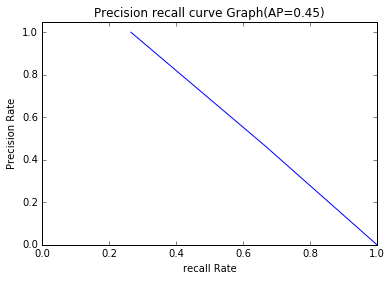

In [53]:



y_predtest = gd_sr.predict(X_test)


grid_fpr, grid_tpr, grid_thresholds = precision_recall_curve(y_test,y_predtest)


auc = auc(grid_fpr, grid_tpr)
f1 = f1_score(y_test,y_predtest)
AP=average_precision_score(y_test,y_predtest)
print('Precision recall curve' )
print('f1=%0.3f '%(f1))
plt.plot(grid_fpr, grid_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('recall Rate')
plt.ylabel('Precision Rate')
plt.title('Precision recall curve Graph(AP=%.2f)'% AP)

plt.show()


In [54]:
from sklearn.linear_model import LogisticRegression
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, param_grid,cv=5, verbose=0)
clf .fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(clf .best_params_))
print("Best score is {}".format(clf .best_score_))
print('Best Penalty:', clf.best_estimator_.get_params()['penalty'])

Tuned Logistic Regression Parameters: {'C': 0.43939705607607948}
Best score is 0.80354159706
('Best Penalty:', 'l2')


C:\ProgramData\Miniconda3\envs\tutorial\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Due to this is larger imbalanced set, we will calculate the F1 in precision and recall rather the ROC curve accuracy. For this, the F1 score, measures the harmonic mean of precision and recal,  > 0.5.

In [55]:
len(y_train)

5986

In [56]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

# Create train and test splits
target_name = 'Churn'
X = new_customer.drop('Churn', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=new_customer[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [57]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.74


In [58]:
new_customer.isnull().any()
new_customer = new_customer.fillna(lambda x: x.median())
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
gender                       7043 non-null int32
SeniorCitizen                7043 non-null int64
Partner                      7043 non-null int64
Dependents                   7043 non-null int64
tenure                       7043 non-null int64
PhoneService                 7043 non-null int64
MultipleLines                7043 non-null int64
OnlineSecurity               7043 non-null int64
OnlineBackup                 7043 non-null int64
DeviceProtection             7043 non-null int64
TechSupport                  7043 non-null int64
StreamingTV                  7043 non-null int64
StreamingMovies              7043 non-null int64
PaperlessBilling             7043 non-null int64
MonthlyCharges               7043 non-null float64
Churn                        7043 non-null int64
DSL                          7043 non-null uint8
Fiber optic                  7043 non-null uint8
No       

In [59]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=0.43)


model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.80


In [60]:

# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.843 (0.014)


In [61]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
  class_weight="balanced", min_weight_fraction_leaf=0.01
    
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
   bootstrap= True, n_estimators=10, min_samples_split=4, criterion='entropy', max_features= 0.25, max_depth=6,
    class_weight="balanced"
    
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))


---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       777
           1       0.00      0.00      0.00       280

   micro avg       0.74      0.74      0.74      1057
   macro avg       0.37      0.50      0.42      1057
weighted avg       0.54      0.74      0.62      1057



 ---Logistic Model---
Logistic AUC = 0.77
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       777
           1       0.53      0.80      0.64       280

   micro avg       0.76      0.76      0.76      1057
   macro avg       0.72      0.77      0.73      1057
weighted avg       0.81      0.76      0.77      1057



 ---Decision Tree Model---
Decision Tree AUC = 0.76
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       777
           1       0.51      0.79      0.62       280

   micro avg       0.74      0.74      0.74   

C:\ProgramData\Miniconda3\envs\tutorial\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Miniconda3\envs\tutorial\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Miniconda3\envs\tutorial\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


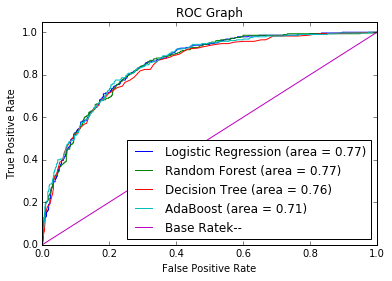

In [62]:

# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test (Zweig & Campbell, 1993). According to our ROC graph, the logistic regression has a best fit model for this problem because AUC =0.77 .

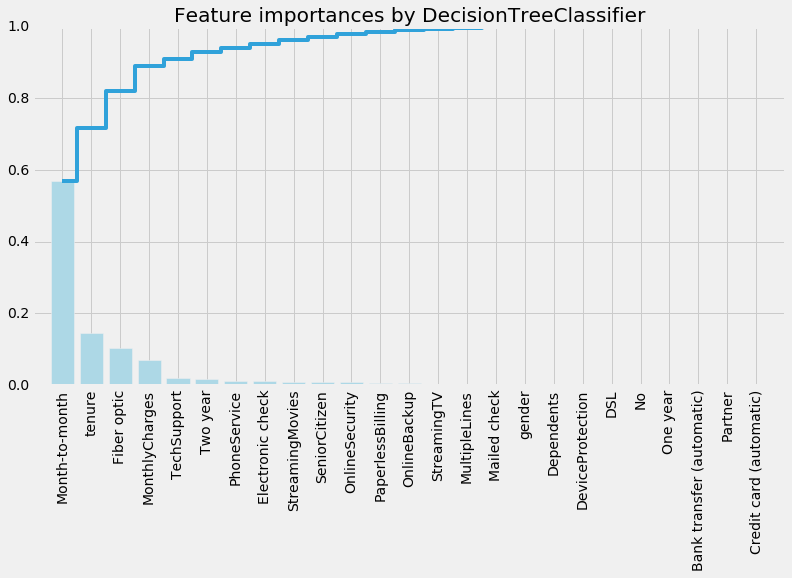

In [63]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = new_customer.drop(['Churn'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Feature Importance
________________________________________

1.	tenure
2.	Fiber optic 
3. month-to-month



# Logistic-regression

In [64]:
plt.figure(figsize=(8, 8))
precison, recall, thresholds = precision_recall_curve(y_test, logis.predict_proba(X_test)[:,1])


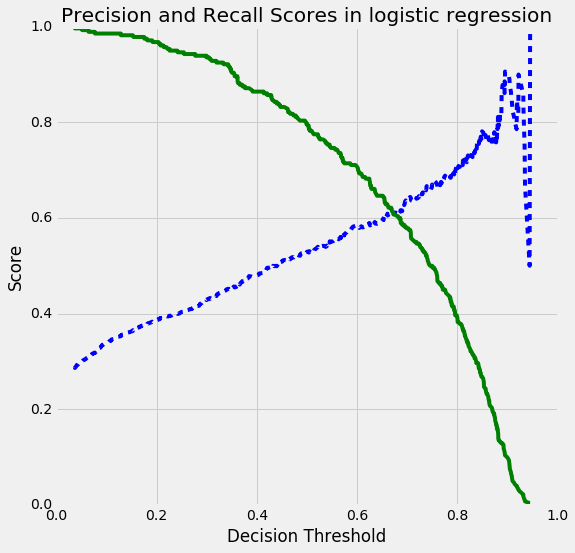

In [65]:
plt.figure(figsize=(8, 8))
plt.title("Precision and Recall Scores in logistic regression")
plt.plot(thresholds,precison[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")


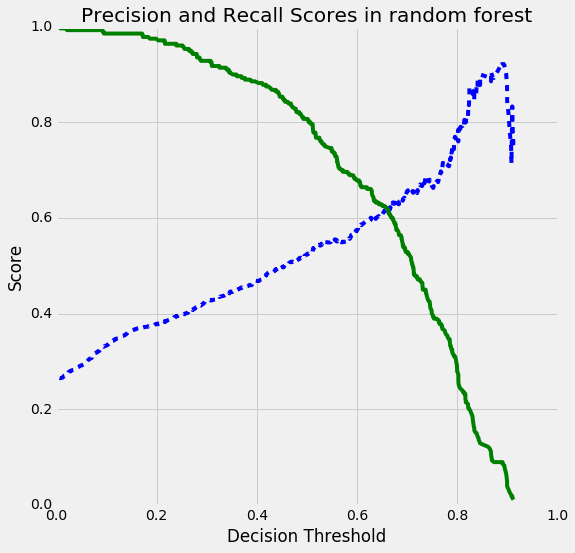

In [66]:
plt.figure(figsize=(8, 8))
precison, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.title("Precision and Recall Scores in random forest")
plt.plot(thresholds,precison[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")


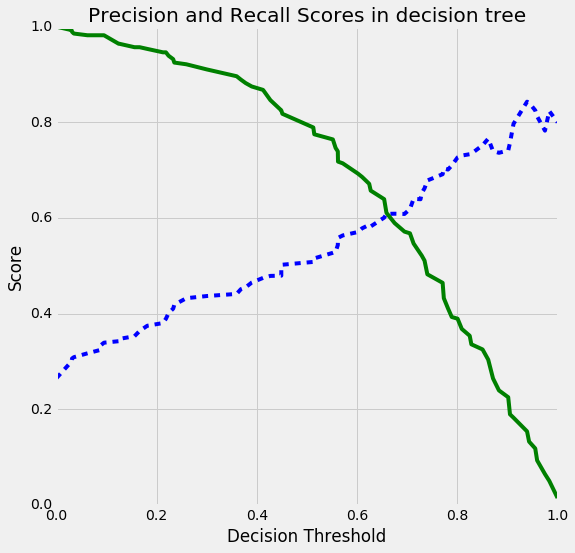

In [67]:
plt.figure(figsize=(8, 8))
precison, recall, thresholds = precision_recall_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.title("Precision and Recall Scores in decision tree")
plt.plot(thresholds,precison[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")


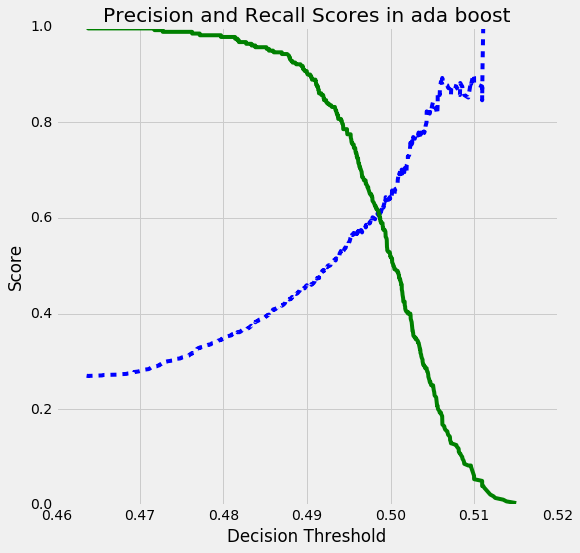

In [68]:

plt.figure(figsize=(8, 8))
precison, recall, thresholds = precision_recall_curve(y_test, ada.predict_proba(X_test)[:,1])
plt.title("Precision and Recall Scores in ada boost")
plt.plot(thresholds,precison[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")

                          

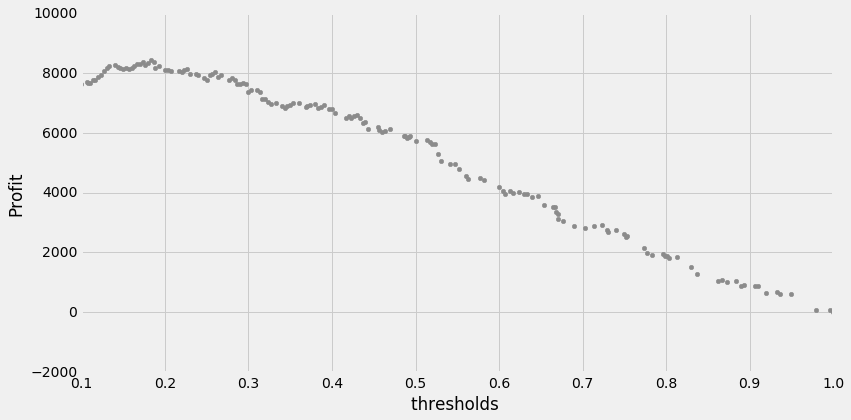

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier  
clf = RandomForestClassifier(n_estimators=300, random_state=0)  
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
X = robust_scaler.fit_transform(X)
y=new_customer[target_name]
test_size_percent = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_percent) 
clf.fit(X_train, y_train) 
predictions = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predictions , pos_label=1)
roc_auc = roc_auc_score(y_test, predictions )



thresholds = np.append(thresholds, 1)  
TP= np.zeros(thresholds.shape)
FP= np.zeros(thresholds.shape)


for i in range(thresholds.shape[0]):
    cm = confusion_matrix(y_test, predictions >= thresholds[i])
    TP[i] = cm[1][1]
    FP[i] = cm[0][1]
#  the special offer
profit = TP*(100)+TP*(-20)+FP*(-20)



plt.scatter(thresholds, profit, color=sns.color_palette()[4]) 

plt.xlim([0.1,1])
plt.xlabel('thresholds ')
plt.ylabel('Profit')

plt.show()



for this project , the when the threshold is increasing , the recall score is declined, the precison score is increasing 

Precision recall curve


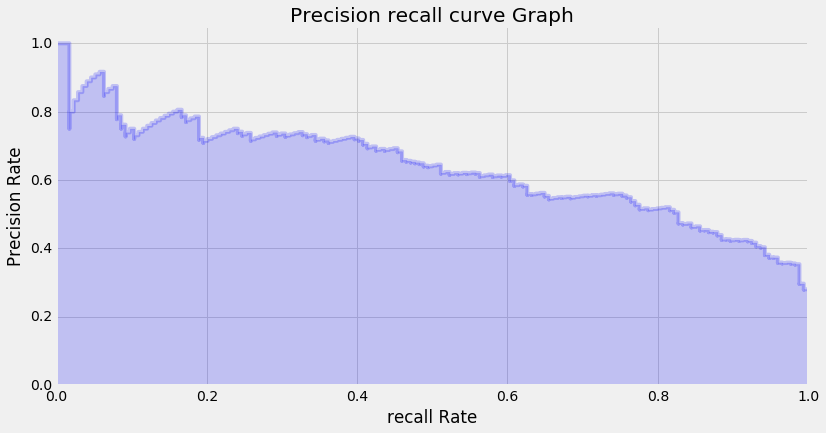

In [70]:
from sklearn.utils.fixes import signature
precison, recall, thresholds = precision_recall_curve(y_test, logis.predict_proba(X_test)[:,1])
print('Precision recall curve' )
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precison, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precison, alpha=0.2, color='b', **step_kwargs)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('recall Rate')
plt.ylabel('Precision Rate')
plt.title('Precision recall curve Graph')
plt.show()

Dependent : 'Churn' 
    
Independent : 'Month-to-month','tenure','Fiber optic'
    

In [71]:
import statsmodels.api as sm
new_customer['int']=1
independentvar=['Month-to-month','tenure','Fiber optic','int']
logReg=sm.Logit(new_customer['Churn'],new_customer[independentvar])
answer=logReg.fit()


Optimization terminated successfully.
         Current function value: 0.439363
         Iterations 7


In [72]:
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Fri, 04 Jan 2019   Pseudo R-squ.:                  0.2406
Time:                        09:25:01   Log-Likelihood:                -3094.4
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Month-to-month     1.2010      0.095     12.590      0.000       1.014       1.388
tenure            -0.0308      0.002    -16.375      0.000      -0.034      -0.027
Fiber optic        1.5123      0.068     22.227      0.000       1.379       1.646
int               -1.8196      0.105    -17.260      0.000      -2.026      -1.613
==================================================================================
"""

In [73]:
answer.params

Month-to-month    1.200992
tenure           -0.030778
Fiber optic       1.512257
int              -1.819628
dtype: float64

In [74]:
coef=answer.params


Hypothetical example:
    
if the customer has month to month payment, fiber internet, and the tenure is 3 months: 

In [75]:
y1=coef[3]+coef[0]*1+coef[1]*3+coef[2]*1
print(y1)

0.801285477303


this custumer would have 80% chance to left the company.

# Random tree

# Interpreting the Data

# 
Summary: With all of this information, this is what we know why customers probably churn:
1.	Customer generally left when they are month to month payment type. 
2. 	Customer is likely to churn in first ten months.
3.	Customers is likely to leave customer when they use Fiber optic service.
4.	But there is 0% customers use fiber only, customers are likely to cancel services when they use phone and fiber.
5.	Customers have no partner and no dependent is highly percent to churn than other. 
6.	Customer month to month, tenure, and fiber optic were the three biggest factors in determining churn.

